In [9]:
import pandas as pd
import contractions
import re
import nltk
import string
from nltk.tokenize import  word_tokenize
import numpy as np
from stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [10]:
#pip install stop_words

In [11]:
df = pd.read_csv('question_responce.csv')	

In [12]:
df['responce']

0       @115904 We'll be sure to pass along your kind ...
1       @115904 Our apologies for the delay in respond...
2       @115905 Aww, that's definitely a future pilot ...
3               @115906 We're sorry for your frustration.
4       @115909 We're glad you got to kick back and en...
                              ...                        
1847    @172376 We know staying connected is important...
1848    @172677 We've capped our fares for nonstop fli...
1849    @143005 Please give our Baggage team a call at...
1850    @143005 Our apologies for the hold. Our Centra...
1851    @172730 We're providing waivers for St Croix, ...
Name: responce, Length: 1852, dtype: object

In [13]:
df.head()

,Unnamed: 0,responce,question
0,603,@115904 We'll be sure to pass along your kind ...,@AmericanAir Erica on the lax team is amazing ...
1,605,@115904 Our apologies for the delay in respond...,@AmericanAir Could you have someone on your la...
2,608,"@115905 Aww, that's definitely a future pilot ...",Ben Tennyson and an American Airlines pilot. 🎃...
3,612,@115906 We're sorry for your frustration.,"@AmericanAir Right, but I earned those. I also..."
4,618,@115909 We're glad you got to kick back and en...,"Thank you, @AmericanAir for playing #ThisIsUs ..."


    • Tokenization
    • Stopwords removal
    • Lowercasing
    • Stemming/Lemmatization
    • Punctuation removal
    • Emoji hadling (translation into symbols or deletion)
    • Removing noise (URLs, hashtags, …)
    • Removing non-english words

In [14]:
#preprocessing


def remove_punctuation(word_list):
    PUNCUATION_LIST = list(string.punctuation)
    return [w for w in word_list if w not in PUNCUATION_LIST]


def preproc_pipe(data):
    
    data = data.dropna()
    data_clean = pd.DataFrame()
    data_clean['text'] = data
    
    #text to lowercase
    data_clean['text'] = data_clean['text'].str.lower()

    #remove URL links
    data_clean['text'] = data_clean['text'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
    data_clean['text'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

    #remove placeholders
    data_clean['text'] = data_clean['text'].apply(lambda x: re.sub(r'{link}', '', x))
    data_clean['text'] = data_clean['text'].apply(lambda x: re.sub(r"\[video\]", '', x))

    #remove HTML reference characters
    data_clean['text'] = data_clean['text'].apply(lambda x: re.sub(r'&[a-z]+;', '', x))

    #remove handles
    data_clean['text'] = data_clean['text'].apply(lambda x: re.sub(r"@([a-zA-Z0-9_]{1,50})","", x))

    #remove non-letter characters
    data_clean['text'] = data_clean['text'].apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))

    # Replace contractions with their longer forms 
    data_clean['text'] = data_clean['text'].apply(lambda x:  contractions.fix(x))



    #tokenize
 

    data_clean['tokens'] = data_clean['text'].apply(nltk.word_tokenize)

    #remove punctuation
    data_clean['tokens'] = data_clean['tokens'].apply(remove_punctuation)


   
    #remove stopwords
    stop_words = list(get_stop_words('en'))         #About 900 stopwords
    nltk_words = list(stopwords.words('english')) #About 150 stopwords
    stop_words.extend(nltk_words)

    data_clean['tokens'] = data_clean['tokens'].apply(lambda x: [w for w in x if w not in stop_words])

    #stemming/lemmatization

      
    lemmatizer = WordNetLemmatizer()
    data_clean['tokens'] = data_clean['tokens'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

    #remove non english word
    #words = set(nltk.corpus.words.words())
    #data_clean['tokens'] = data_clean['tokens'].apply(lambda x: [w for w in x if w in words])


    return data_clean


df[['responce_clean','token_responce']] = preproc_pipe(df['responce'])
df[['question_clean','token_question']] = preproc_pipe(df['question'])
df.head()


,Unnamed: 0,responce,question,responce_clean,token_responce,question_clean,token_question
0,603,@115904 We'll be sure to pass along your kind ...,@AmericanAir Erica on the lax team is amazing ...,we will be sure to pass along your kind words...,"[sure, pas, along, kind, word, aateam]",erica on the lax team is amazing give her a r...,"[erica, lax, team, amazing, give, raise, ty]"
1,605,@115904 Our apologies for the delay in respond...,@AmericanAir Could you have someone on your la...,our apologies for the delay in responding to ...,"[apology, delay, responding, made, lax, let, u...",could you have someone on your lax team avail...,"[someone, lax, team, available, guide, gate, s..."
2,608,"@115905 Aww, that's definitely a future pilot ...",Ben Tennyson and an American Airlines pilot. 🎃...,aww that is definitely a future pilot in the ...,"[aww, definitely, future, pilot, making, happy...",ben tennyson and an american airlines pilot #...,"[ben, tennyson, american, airline, pilot, trun..."
3,612,@115906 We're sorry for your frustration.,"@AmericanAir Right, but I earned those. I also...",we are sorry for your frustration,"[sorry, frustration]",right but i earned those i also should not ha...,"[right, earned, also, pay, pas, spouse, need, ..."
4,618,@115909 We're glad you got to kick back and en...,"Thank you, @AmericanAir for playing #ThisIsUs ...",we are glad you got to kick back and enjoy a ...,"[glad, got, kick, back, enjoy, show, flying, t...",thank you for playing #thisisus and for havin...,"[thank, playing, thisisus, great, flight, atte..."


In [15]:
#pip install wordcloud

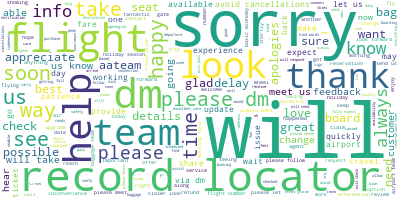

In [16]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(df['responce_clean'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

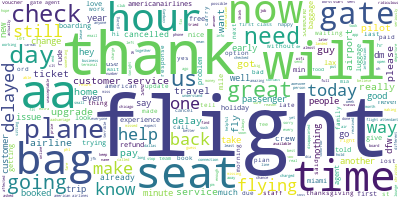

In [17]:
long_string = ','.join(list(df['question_clean'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

TOPIC MODELING LDA

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [18]:
#pip install gensim

In [19]:
import gensim.corpora as corpora# Create Dictionary
data_words = df['token_question']
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [20]:
from pprint import pprint# number of topics
import gensim
num_topics = 20# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"bag" + 0.014*"flight" + 0.014*"thanks" + 0.009*"day" + '
  '0.008*"flying" + 0.008*"check" + 0.007*"good" + 0.007*"carry" + 0.007*"get" '
  '+ 0.007*"thank"'),
 (1,
  '0.025*"flight" + 0.019*"get" + 0.015*"bag" + 0.011*"way" + 0.011*"plane" + '
  '0.010*"hour" + 0.010*"one" + 0.009*"customer" + 0.008*"u" + 0.008*"thanks"'),
 (2,
  '0.019*"flight" + 0.017*"aa" + 0.011*"thanks" + 0.010*"service" + '
  '0.008*"today" + 0.007*"staff" + 0.007*"thank" + 0.006*"got" + '
  '0.006*"airline" + 0.006*"luggage"'),
 (3,
  '0.025*"flight" + 0.014*"time" + 0.012*"get" + 0.010*"bag" + 0.007*"seat" + '
  '0.007*"plane" + 0.006*"going" + 0.006*"fly" + 0.006*"like" + '
  '0.006*"please"'),
 (4,
  '0.021*"flight" + 0.018*"aa" + 0.009*"seat" + 0.007*"charged" + '
  '0.007*"please" + 0.007*"dm" + 0.007*"delay" + 0.006*"customer" + '
  '0.005*"ticket" + 0.005*"make"'),
 (5,
  '0.035*"flight" + 0.010*"seat" + 0.009*"make" + 0.008*"thanks" + '
  '0.008*"airline" + 0.007*"plane" + 0.007*"day" + 0

In [21]:
#! pip install pyLDAvis

In [22]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/germain/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of 

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13    -0.007224  0.009478       1        1  8.033992
18     0.016065 -0.046240       2        1  7.251969
11    -0.048938 -0.004170       3        1  6.344347
1      0.009123 -0.028726       4        1  6.337479
5      0.056749  0.015124       5        1  5.847717
8     -0.019352 -0.097284       6        1  5.724412
17    -0.072836  0.008164       7        1  5.554137
15    -0.003054 -0.055959       8        1  5.362526
14     0.104081 -0.032621       9        1  4.936356
3      0.054338 -0.035246      10        1  4.821461
0      0.078061  0.015905      11        1  4.761684
6     -0.029986  0.074371      12        1  4.735048
4     -0.039927 -0.011935      13        1  4.255865
12    -0.071363  0.000436      14        1  4.052167
16    -0.007110 -0.035478      15        1  4.030498
10     0.066972  0.003784      16        1  3.888375
19    -0.027342  0.065029      17        1  3.882855
2     -0.022697  0.054482      18        1  3.648025
7      0.038377  0.127980      19        1  3.393588
9     -0.073935 -0.027095      20        1  3.137496, topic_info=        Term        Freq       Total Category  logprob  loglift
40        aa  126.000000  126.000000  Default  30.0000  30.0000
249      bag  112.000000  112.000000  Default  29.0000  29.0000
33    flight  519.000000  519.000000  Default  28.0000  28.0000
98   upgrade   43.000000   43.000000  Default  27.0000  27.0000
85      help   66.000000   66.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
463     know    2.719428   56.868359  Topic20  -5.3698   0.4214
630       dm    2.354492   31.261751  Topic20  -5.5139   0.8757
35      home    2.354564   47.520538  Topic20  -5.5139   0.4569
96    thanks    2.589663  119.326699  Topic20  -5.4187  -0.3686
617    first    2.354584   56.072732  Topic20  -5.5139   0.2915

[1565 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
39        2  0.042727     's
39        4  0.042727     's
39        6  0.085454     's
39        7  0.042727     's
39        8  0.042727     's
...     ...       ...    ...
903      20  0.105536    yet
1386     16  0.626670  yikes
3283     11  0.615794  youth
1574      9  0.616252    yyz
1574     16  0.308126    yyz

[4527 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 19, 12, 2, 6, 9, 18, 16, 15, 4, 1, 7, 5, 13, 17, 11, 20, 3, 8, 10])

In [23]:
print('Perplexity: ', lda_model.log_perplexity(corpus))  

Perplexity:  -8.465954301335222


In [24]:
df.head()

,Unnamed: 0,responce,question,responce_clean,token_responce,question_clean,token_question
0,603,@115904 We'll be sure to pass along your kind ...,@AmericanAir Erica on the lax team is amazing ...,we will be sure to pass along your kind words...,"[sure, pas, along, kind, word, aateam]",erica on the lax team is amazing give her a r...,"[erica, lax, team, amazing, give, raise, ty]"
1,605,@115904 Our apologies for the delay in respond...,@AmericanAir Could you have someone on your la...,our apologies for the delay in responding to ...,"[apology, delay, responding, made, lax, let, u...",could you have someone on your lax team avail...,"[someone, lax, team, available, guide, gate, s..."
2,608,"@115905 Aww, that's definitely a future pilot ...",Ben Tennyson and an American Airlines pilot. 🎃...,aww that is definitely a future pilot in the ...,"[aww, definitely, future, pilot, making, happy...",ben tennyson and an american airlines pilot #...,"[ben, tennyson, american, airline, pilot, trun..."
3,612,@115906 We're sorry for your frustration.,"@AmericanAir Right, but I earned those. I also...",we are sorry for your frustration,"[sorry, frustration]",right but i earned those i also should not ha...,"[right, earned, also, pay, pas, spouse, need, ..."
4,618,@115909 We're glad you got to kick back and en...,"Thank you, @AmericanAir for playing #ThisIsUs ...",we are glad you got to kick back and enjoy a ...,"[glad, got, kick, back, enjoy, show, flying, t...",thank you for playing #thisisus and for havin...,"[thank, playing, thisisus, great, flight, atte..."


SIMILARITY WITH WORD EMBEEDING

In [25]:
print(id2word[0])

amazing


In [26]:
pprint(id2word)

VECTORIZE

In [27]:
# We just need to run this code once, the function glove2word2vec saves the Glove embeddings in the word2vec format 
# that will be loaded in the next section
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
glove2word2vec('/home/germain/Documents/Rule_Based_ChatBot/glove.twitter.27B.100d.txt', 'glove.twitter.27B.100d.word2vec')

/tmp/ipykernel_111235/3710635885.py:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec('/home/germain/Documents/Rule_Based_ChatBot/glove.twitter.27B.100d.txt', 'glove.twitter.27B.100d.word2vec')


(1193514, 100)

In [28]:
# load the Stanford GloVe model
model = KeyedVectors.load_word2vec_format('glove.twitter.27B.100d.word2vec', binary=False)

In [29]:


#vectorize tweets with our model
def vectorize(tokenized_sentence):
    result = []
    for token in tokenized_sentence:
        if(token in model.key_to_index):
            result.append(model[token])
    return np.mean(result, axis=0)



df['responce_vect'] = df['token_responce'].apply(vectorize)
df['question_vect'] = df['token_question'].apply(vectorize)

/home/germain/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/germain/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [30]:
df.head()

,Unnamed: 0,responce,question,responce_clean,token_responce,question_clean,token_question,responce_vect,question_vect
0,603,@115904 We'll be sure to pass along your kind ...,@AmericanAir Erica on the lax team is amazing ...,we will be sure to pass along your kind words...,"[sure, pas, along, kind, word, aateam]",erica on the lax team is amazing give her a r...,"[erica, lax, team, amazing, give, raise, ty]","[0.37849, 0.1892584, -0.29027262, 0.21515799, ...","[-0.06730857, 0.3962247, 0.142786, -0.24699958..."
1,605,@115904 Our apologies for the delay in respond...,@AmericanAir Could you have someone on your la...,our apologies for the delay in responding to ...,"[apology, delay, responding, made, lax, let, u...",could you have someone on your lax team avail...,"[someone, lax, team, available, guide, gate, s...","[0.12149036, 0.54875636, 0.020310445, 0.004866...","[0.09496025, 0.07447537, -0.21062127, -0.26413..."
2,608,"@115905 Aww, that's definitely a future pilot ...",Ben Tennyson and an American Airlines pilot. 🎃...,aww that is definitely a future pilot in the ...,"[aww, definitely, future, pilot, making, happy...",ben tennyson and an american airlines pilot #...,"[ben, tennyson, american, airline, pilot, trun...","[0.07161363, 0.03607704, 0.18523432, -0.09224,...","[0.192312, -0.38862815, 0.12754285, 0.11040427..."
3,612,@115906 We're sorry for your frustration.,"@AmericanAir Right, but I earned those. I also...",we are sorry for your frustration,"[sorry, frustration]",right but i earned those i also should not ha...,"[right, earned, also, pay, pas, spouse, need, ...","[0.096475005, 0.46796, 0.1085385, -0.17306, -0...","[0.07478006, 0.23710653, -0.08204646, 0.282314..."
4,618,@115909 We're glad you got to kick back and en...,"Thank you, @AmericanAir for playing #ThisIsUs ...",we are glad you got to kick back and enjoy a ...,"[glad, got, kick, back, enjoy, show, flying, t...",thank you for playing #thisisus and for havin...,"[thank, playing, thisisus, great, flight, atte...","[0.1774251, 0.23254581, -0.013699703, -0.14585...","[0.1678521, 0.3448258, 0.09571555, -0.3570742,..."


DICT OF INTENDS

In [48]:
sentence = input()
sentence

'Hey @AmericanAir  AA-1038 plane was broken and now my flight is delayed and I am upset and tweeting you about that but also why is it broken'

In [49]:
#put sentence to a dataframe
d = {'text': [sentence]}
phrase = pd.DataFrame(data=d)
phrase['text']

#just tokenize the sentence
phrase['tokens'] = phrase['text'].apply(nltk.word_tokenize)
phrase['tokens']

#and vectorized it
phrase['vectorized'] = phrase['tokens'].apply(vectorize)
phrase['vectorized']

0    [0.16233058, 0.15998231, 0.07710492, 0.0180290...
Name: vectorized, dtype: object

In [41]:
df = df.dropna()

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

b = float(0)
compt = 0
cosi = []
for i in df.index:
    cosi.append(float(cosine_similarity(phrase['vectorized'][0].reshape(1, -1),df['question_vect'][i].reshape(1, -1))))
    compt +=1
df['cosine'] = cosi

In [55]:
# Euclidian Distance beetween vectorized sentence and vectorized tweets

b = float(0)
compt = 0
eucl = []
for i in df.index:
    eucl.append(float(euclidean_distances(phrase['vectorized'][0].reshape(1, -1),df['question_vect'][i].reshape(1, -1))))
    compt +=1
df['euclidian'] = eucl


In [44]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
from tabulate import tabulate

In [56]:
#print the top 5 most relevant tweet with cosine similarity
print(sentence)
print(tabulate(df[['question','cosine']].nlargest(5, ['cosine']), headers='keys', tablefmt='psql'))


Hey @AmericanAir  AA-1038 plane was broken and now my flight is delayed and I am upset and tweeting you about that but also why is it broken
+------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+
|      | question                                                                                                                                                                                                                                                                                            |   cosine |
|------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [57]:
#print the top 5 most relevant tweet with euclidian distance
print(sentence)
print(tabulate(df[['question','euclidian']].nsmallest(5, ['euclidian']), headers='keys', tablefmt='psql'))

Hey @AmericanAir  AA-1038 plane was broken and now my flight is delayed and I am upset and tweeting you about that but also why is it broken
+------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|      | question                                                                                                                                                                                                                                                                   |   euclidian |
|------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [114]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

def reponse (sentence):
    #put sentence to a dataframe
    d = {'text': [sentence]}
    phrase = pd.DataFrame(data=d)
    phrase['text']

    #just tokenize the sentence
    phrase['tokens'] = phrase['text'].apply(nltk.word_tokenize)
    phrase['tokens']

    #and vectorized it
    phrase['vectorized'] = phrase['tokens'].apply(vectorize)
    phrase['vectorized']



    b = float(0)
    compt = 0
    cosi = []
    for i in df.index:
        cosi.append(float(cosine_similarity(phrase['vectorized'][0].reshape(1, -1),df['question_vect'][i].reshape(1, -1))))
        compt +=1
    df['cosine'] = cosi

    return df[['responce','question','cosine']].nlargest(1, ['cosine'])['responce'].values[0]



In [120]:
def bot():
    flag=True

    while(flag==True):
        user_response = input()
        print("You : "+user_response)
        user_response=user_response.lower()
        if(user_response!='bye'):
            if(user_response=='thanks' or user_response=='thank you' ):
                flag=False
                
                print("AirBOT: You are welcome..")
            else:
                if(greeting(user_response)!=None):
                    
                    print("AirBOT: "+greeting(user_response))
                else:
                    
                    print("AirBOT:"+reponse(user_response))
                    #sent_tokens.remove(user_response)
        else:
            flag=False
            
            print("AirBOT: Bye! take care..")

In [116]:
import random

GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [117]:
def main():
    print("AirBOT: My name is AirBOT. I will answer your queries about our flights. If you want to exit, type Bye!")
    bot()


In [121]:
main()

AirBOT: My name is AirBOT. I will answer your queries about our flights. If you want to exit, type Bye!
You : hello
AirBOT: hello
You : hello
AirBOT: I am glad! You are talking to me
You : hi
AirBOT: hi there
You : sup
AirBOT: hi there
You : hi
AirBOT: hello
You : what is the problem with your company ?
AirBOT:@134911 We’re working to address this issue. We do expect to avoid cancellations this holiday season.
You : any issue ?
AirBOT:@118124 Please send the requested info via DM. We need your contact info (phone and email).
You : issue ?
AirBOT:@118124 Please send the requested info via DM. We need your contact info (phone and email).
You : 


/home/germain/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


ValueError: Input contains NaN.

In [112]:
a = df[['responce','question','cosine']].nlargest(1, ['cosine'])['responce'].values[0]

In [113]:
a

'@138977 We want every point of contact to be excellent, how can we help?'